# 9章：演習問題の解答

In [1]:
%pip install -q japanize-matplotlib-jlite
import japanize_matplotlib_jlite
import matplotlib.pyplot as plt
import random

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 28.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


## 演習1

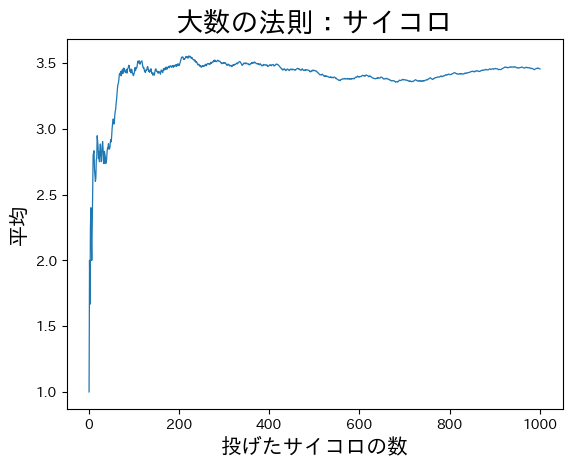

In [2]:
N = 1_000
sample = range(1, N+1)

random.seed(123)

dice_sum = 0
avr_lst = []

for i in range(1, N+1):
    dice = random.randint(1, 6)
    dice_sum += dice
    avr = dice_sum / i
    avr_lst.append(avr)

plt.plot(sample, avr_lst, linewidth=0.9)
plt.title("大数の法則：サイコロ", size=20)
plt.xlabel("投げたサイコロの数", size=15)
plt.ylabel("平均", size=15)
plt.show()

## 演習2

In [3]:
def standardized_avr(n):
    """
    [引数] n：同時に投げるサイコロの数
    [戻り値] サイコロの目の平均を標準化した値"""

    dice_thrown = [random.randint(1, 6) for _ in range(n)]
    dice_sum = sum(dice_thrown)
    st_avr = (dice_sum/n - 3.5) / ( (35/12)/n )**0.5
    return st_avr

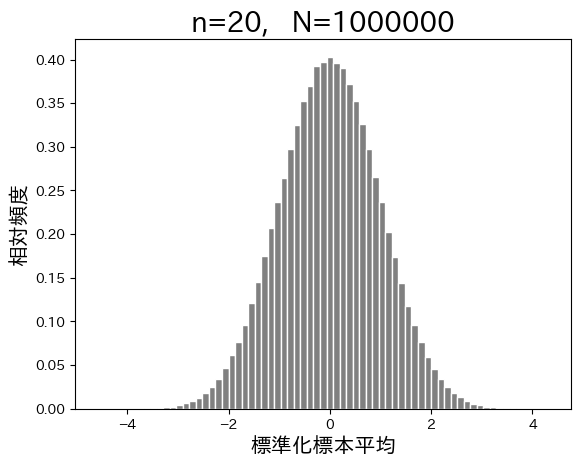

In [4]:
random.seed(123)
n, N = 20, 1_000_000
st_dice_thrown = [standardized_avr(n) for _ in range(N)]
unique = len( set(st_dice_thrown) )
plt.hist(st_dice_thrown, bins=unique,
         color="grey",
         edgecolor="white",
         density=True)
plt.title(f"n={n},   N={N}", size=20)
plt.xlabel("標準化標本平均", size=15)
plt.ylabel("相対頻度", size=15)
plt.show()

## 演習3

### (1)

In [5]:
1 * 1 / 2

0.5

### (2)

In [6]:
random.uniform(0, 1)

0.3606615796276821

### (3)

In [7]:
n = 1000
inside = 0
inside_ratio = []

for i in range(1, n+1):

    x = random.uniform(0, 1)
    y = random.uniform(0, 1)

    if y <= x:
        inside += 1

    estimate = inside / i   # 正方形の面積は1なので，この割合がそのまま面積となる
    inside_ratio.append( estimate )

# inside_ratio

### (4)


次のコードの`plt.axhline()`関数は，第一引数の値を縦軸に使い横軸と平行線をプロットします。基本的な引数はラインプロットと同じです。

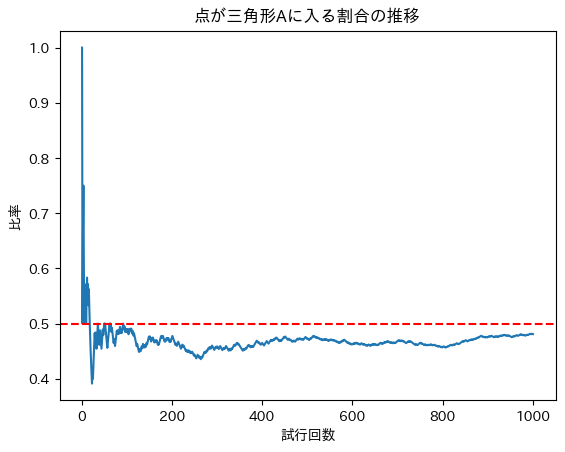

In [8]:
plt.plot(range(1, n+1), inside_ratio)
plt.axhline(0.5, color="red", linestyle="--")
plt.xlabel("試行回数")
plt.ylabel("比率")
plt.title("点が三角形Aに入る割合の推移")
plt.show()

### (5)

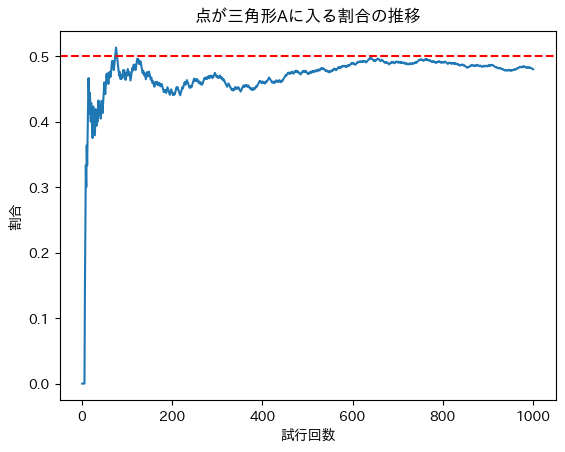

In [9]:
def estimate_triangle(n, seed=None):
    random.seed(seed)
    inside = 0
    inside_ratio = []

    for i in range(1, n+1):

        x = random.uniform(0, 1)
        y = random.uniform(0, 1)

        if y <= x:
            inside += 1

        estimate = inside / i
        inside_ratio.append( estimate )

    plt.plot(range(1, n+1), inside_ratio)
    plt.axhline(0.5, color="red", linestyle="--")  # 横線を引く
    plt.xlabel("試行回数")
    plt.ylabel("割合")
    plt.title("点が三角形Aに入る割合の推移")
    plt.show()

estimate_triangle(1000)

## 演習4

### (1)

In [10]:
10 * 10

100

### (2)

In [11]:
5 * 5 / 2

12.5

### (3)

* $q\leq 10 - p$
* $q \geq 5$

### (4)

In [12]:
n = 1000
S = 100    # 正方形Sの面積
inside = 0
area_A = []

for i in range(1, n+1):

    q = random.uniform(0, 10)
    p = random.uniform(0, 10)

    if (q <= 10-p) and (q >= 5):    # 条件を満たすか判断
        inside += 1

    estimate = S * ( inside / i )   # 消費者余剰Aの推計値
    area_A.append( estimate )

# area_A

### (5)

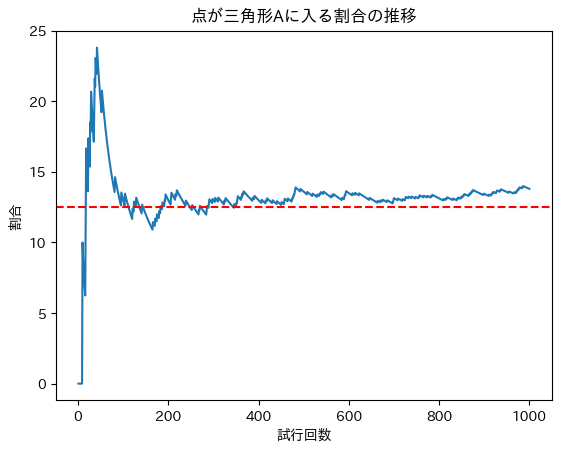

In [13]:
plt.plot(range(1, n+1), area_A)
plt.axhline(12.5, color="red", linestyle="--")
plt.xlabel("試行回数")
plt.ylabel("割合")
plt.title("点が三角形Aに入る割合の推移")
plt.show()

### (6)

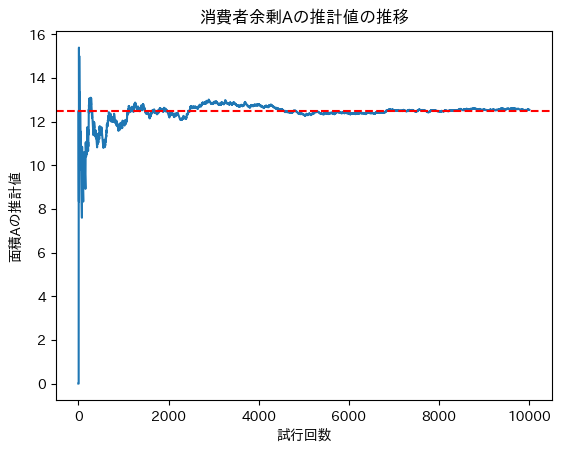

In [14]:
def estimate_cs(n, seed=None):
    random.seed(seed)

    S = 100    # 正方形Sの面積
    inside = 0
    area_A = []

    for i in range(1, n+1):

        q = random.uniform(0, 10)
        p = random.uniform(0, 10)

        if (q <= 10-p) and (q >= 5):
            inside += 1

        estimate = S * ( inside / i )   # 消費者余剰Aの推計値
        area_A.append( estimate )

    plt.plot(range(1, n+1), area_A)
    plt.axhline(12.5, color="red", linestyle="--")  # 横線を引く
    plt.xlabel("試行回数")
    plt.ylabel("面積Aの推計値")
    plt.title("消費者余剰Aの推計値の推移")
    plt.show()

estimate_cs(10000)